## 1. Qual a diferença entre Big Data e Ciência de Dados?

- Big Data diz respeito ao volume de dados variados sendo transmitidos em altas velocidades e partir de várias fontes; além disso, esse conceito muitas vezes trás consigo o valor inerente aos dados e sua veracidade.
- Já Ciência de Dados remete ao processo de tomada de decisão a partir dos insights extraídos de dados.
- Fica, então, claro que o primeiro é relacionado aos dados em si; enquanto o segundo lida com o processo de análise destes dados, que vai da preparação e extração de conhecimento até, por fim, à tomada de decisão e posterior avaliação desta.

## 2. De que forma Estatística, Mineração de Dados e Aprendizagem de Máquina interagem com Ciência de Dados? 

- A aprendizagem de máquina (AM) utiliza de algoritmos que são capazes de aprender a realizar (melhor) alguma tarefa com a experiência--por exemplo, registro histórico de *spams* e *hams*.
- A mineração de dados (MD), assim como a AM, tem forte base em métodos matemáticos e estatísticos tal que seja possível extrair conhecimento a partir dos dados disponíveis.
- Esse conhecimento é o último insumo do trabalho do cientista de dados; isto é, o cientista usa de métodos de AM e MD tal que consiga, por fim, obter conhecimento, que será usado na tomada de decisão do contexto em que o cientista se encontra.

## 3. Mostre a importância do conhecimento de domínio para o cientista de dados.

- Conhecimento prévio a respeito do domínio que se estuda e se busca extrair insights é importante pois possibilita ao cientista avaliar a qualidade do resultado final, isto é, se o mesmo condiz com as expectativas oriundas da experiência do cientista naquele domínio ou é algo totalmente diferente.

- Essa avaliação mostra sua importância na momento de tomada de decisão: cientistas de dados com experiência no tema em questão têm melhores condições de entender os resultados finais.

## 4. Crie um conjunto de dados com duas variáveis V1 e V2, tal que:

- Mediana de V1 < Média de V1
- Mediana de V2 > Média de V2

Lembre que média de um um conjunto de amostras $X$ é definida como $\mu = \frac{1}{N} \sum_{n=1}^N x_i$.

E a mediana é apenas o valor que divide o percentil 50, ou seja, o valor que divide a metade menor da metade maior do conjunto.

In [1]:
import numpy as np
np.random.seed(1)

samples = 100

#### Criar manualmente tais conjuntos

- Para um conjunto onde a mediana é menor, mas definir uma mediana qualquer e popular a parte de menor com valores baixos e a parte maior com valores muito altos.
- Para obter uma mediana maior basta fazer definir um conjunto semelhante a distribuição pareto, ou a distribuição Laplace. Uma mediana muito alta com valores tanto acima ou abaixo do percentil 50 bem menores do que ela.

### A. Mediana de $V_1$ < Média de $V_1$

In [2]:
v1 = np.random.lognormal(0, 1, size=samples)
v1.mean(), np.median(v1)

(1.5659517054319008, 1.0662650178270745)

### B. Mediana de $V_2$ > Média de $V_2$

In [3]:
v2 = np.random.beta(5, 1, size=samples)
mean, median = v2.mean(), np.median(v2)
v2.mean(), np.median(v2)

(0.8274441048188587, 0.8589372391390213)

## 5. Baseando-se no conjunto de dados criado na questão 4, crie uma função em Python que:

- Mostra o histograma de cada variável;
- Verifica se as variáveis seguem uma distribuição Normal (use teste de hipótese)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

,0
count,100.000000
mean,1.565952
std,1.582337
min,0.100105
25%,0.541284
50%,1.066265
75%,1.892750
max,8.895766


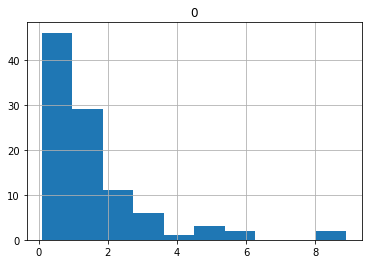

In [5]:
X1 = pd.DataFrame(v1)
X1.hist()
X1.describe()

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [6]:
from scipy import stats

def normal_test(v):
    normal_dist = np.random.normal(0, 1, size=samples)
    x = np.concatenate((normal_dist, v))
    k2, p = stats.normaltest(x)
    alpha = 1e-3

    if p < alpha:  # h0: x vem de uma distribuição normal
        print("A hipótese nula pode ser rejeitada.")
    else:
        print("A hipótese nula não pode ser rejeitada.")

    print("valor-p = {:g}".format(p))

In [7]:
normal_test(v1)

A hipótese nula pode ser rejeitada.
valor-p = 2.54124e-21


---

,0
count,100.000000
mean,0.827444
std,0.140117
min,0.415723
25%,0.747733
50%,0.858937
75%,0.941148
max,0.999958


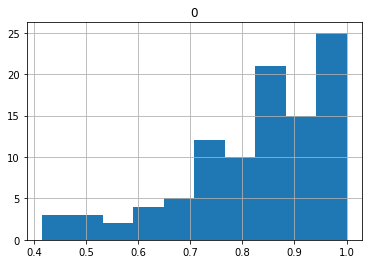

In [8]:
X2 = pd.DataFrame(v2)
X2.hist()
X2.describe()

In [9]:
normal_test(v2)

A hipótese nula pode ser rejeitada.
valor-p = 1.34434e-05


---

In [10]:
normal = np.random.normal(0, 1, size=samples)
normal_test(normal) # se fosse normal, o teste seria a favor de h0

A hipótese nula não pode ser rejeitada.
valor-p = 0.517134


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7ad439c90>]],
      dtype=object)

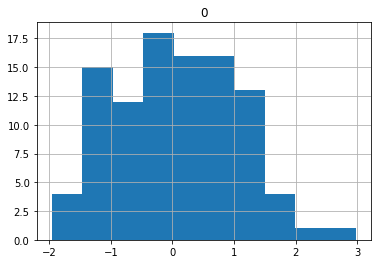

In [11]:
pd.DataFrame(normal).hist()